### requires python 3 and TSS conda environment (needed for parallelization)

### Motivation: 
TSS: Focused and dispersed. 
Within each TSS there are variations to where the start site occurs across different tissues. 
When calling our peaks, we choose the CHO peak if it occurs, otherwise pick the tissue with the maximum p-value.

One question that arises is when we call the TSS, how different are the read alignments when a) The TSS align b) The TSS are shifted between CHO and tissues and c) No CHO peak is seen, only tissues d) only CHO TSS

For each of these, how many TSS' are seen for each. How many tissues have a TSS when they all agree with CHO and when they are offset from CHO.

When they are offset versus aligned, what is the distribution of tags underneath (the density)


In the same vein, we want to make sure that the CHO GRO-Cap and CHO csRNA peaks are both showing similar buildup profiles, and that when plotting histograms, they don't just look good because the GRO-Cap is aligning on the GRO-cap peaks and csRNA aligning on csRNA peaks. Therefore, each should be done to the opposite calls.

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
from os.path import join
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
from tqdm import *
from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import helper
import create_output
print('Number of tissues: ',len(tissues))

from collections import Counter


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


Number of tissues:  13


In [2]:
from numpanpar import parallel_df as pardf

In [3]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

## Parameters and directories

In [4]:
sample_peaks_dir = "../Results/tss_annotation_peaks/"
merged_dir = "../Results/merged"
save_dir = "Results/histograms/compare_tissues/Figures"
in_dir = "Results/histograms/compare_tissues"
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [5]:
tissue = "CHO"
seq = "GROCap"
rep = "1"
tag_f = join(data_folder, tissue, seq, "f03_tags", "trim_" + tissue + "_" + seq + rep)


In [10]:
def run_hist(peak_files, tag_f,f_save, out_hist, region, res, pc, label=None, names=None, to_norm=False, verbose=True, same_ylim=True):
    hist_files = list(map(lambda x: join(out_hist,os.path.basename(x).replace(".tsv","")), peak_files))
    number_peaks = []
    for ind,h in enumerate(hist_files):
        print(h)
        p = peak_files[ind]
        hist(tag_f,h,ref_fa,anno_gff,mode='peak',peak=p,region=region,res=res,pc=pc, 
             include_norm=to_norm, include_heat=False, verbose=verbose)
        number_peaks.append(file_len(p) - 1)
        
    if names==None:
        names = hist_files     
        
    wrap_hist_plot(hist_files, hist_save=join(out_hist, f_save), 
                    names=names, include_negative=False, n=number_peaks, 
              xlims=None, label=label, to_norm=to_norm, same_ylim=same_ylim)

    return


### PC=0

Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_tol_0
Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_maxDistance_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_maxDistance_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_tol_0
Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0/cho_disagree3_maxDistance_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_maxDistance_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0_norm/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0_norm/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -histNorm 100 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 0 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc0_norm/cho_disagree3_tol_0Norm
Results/histograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

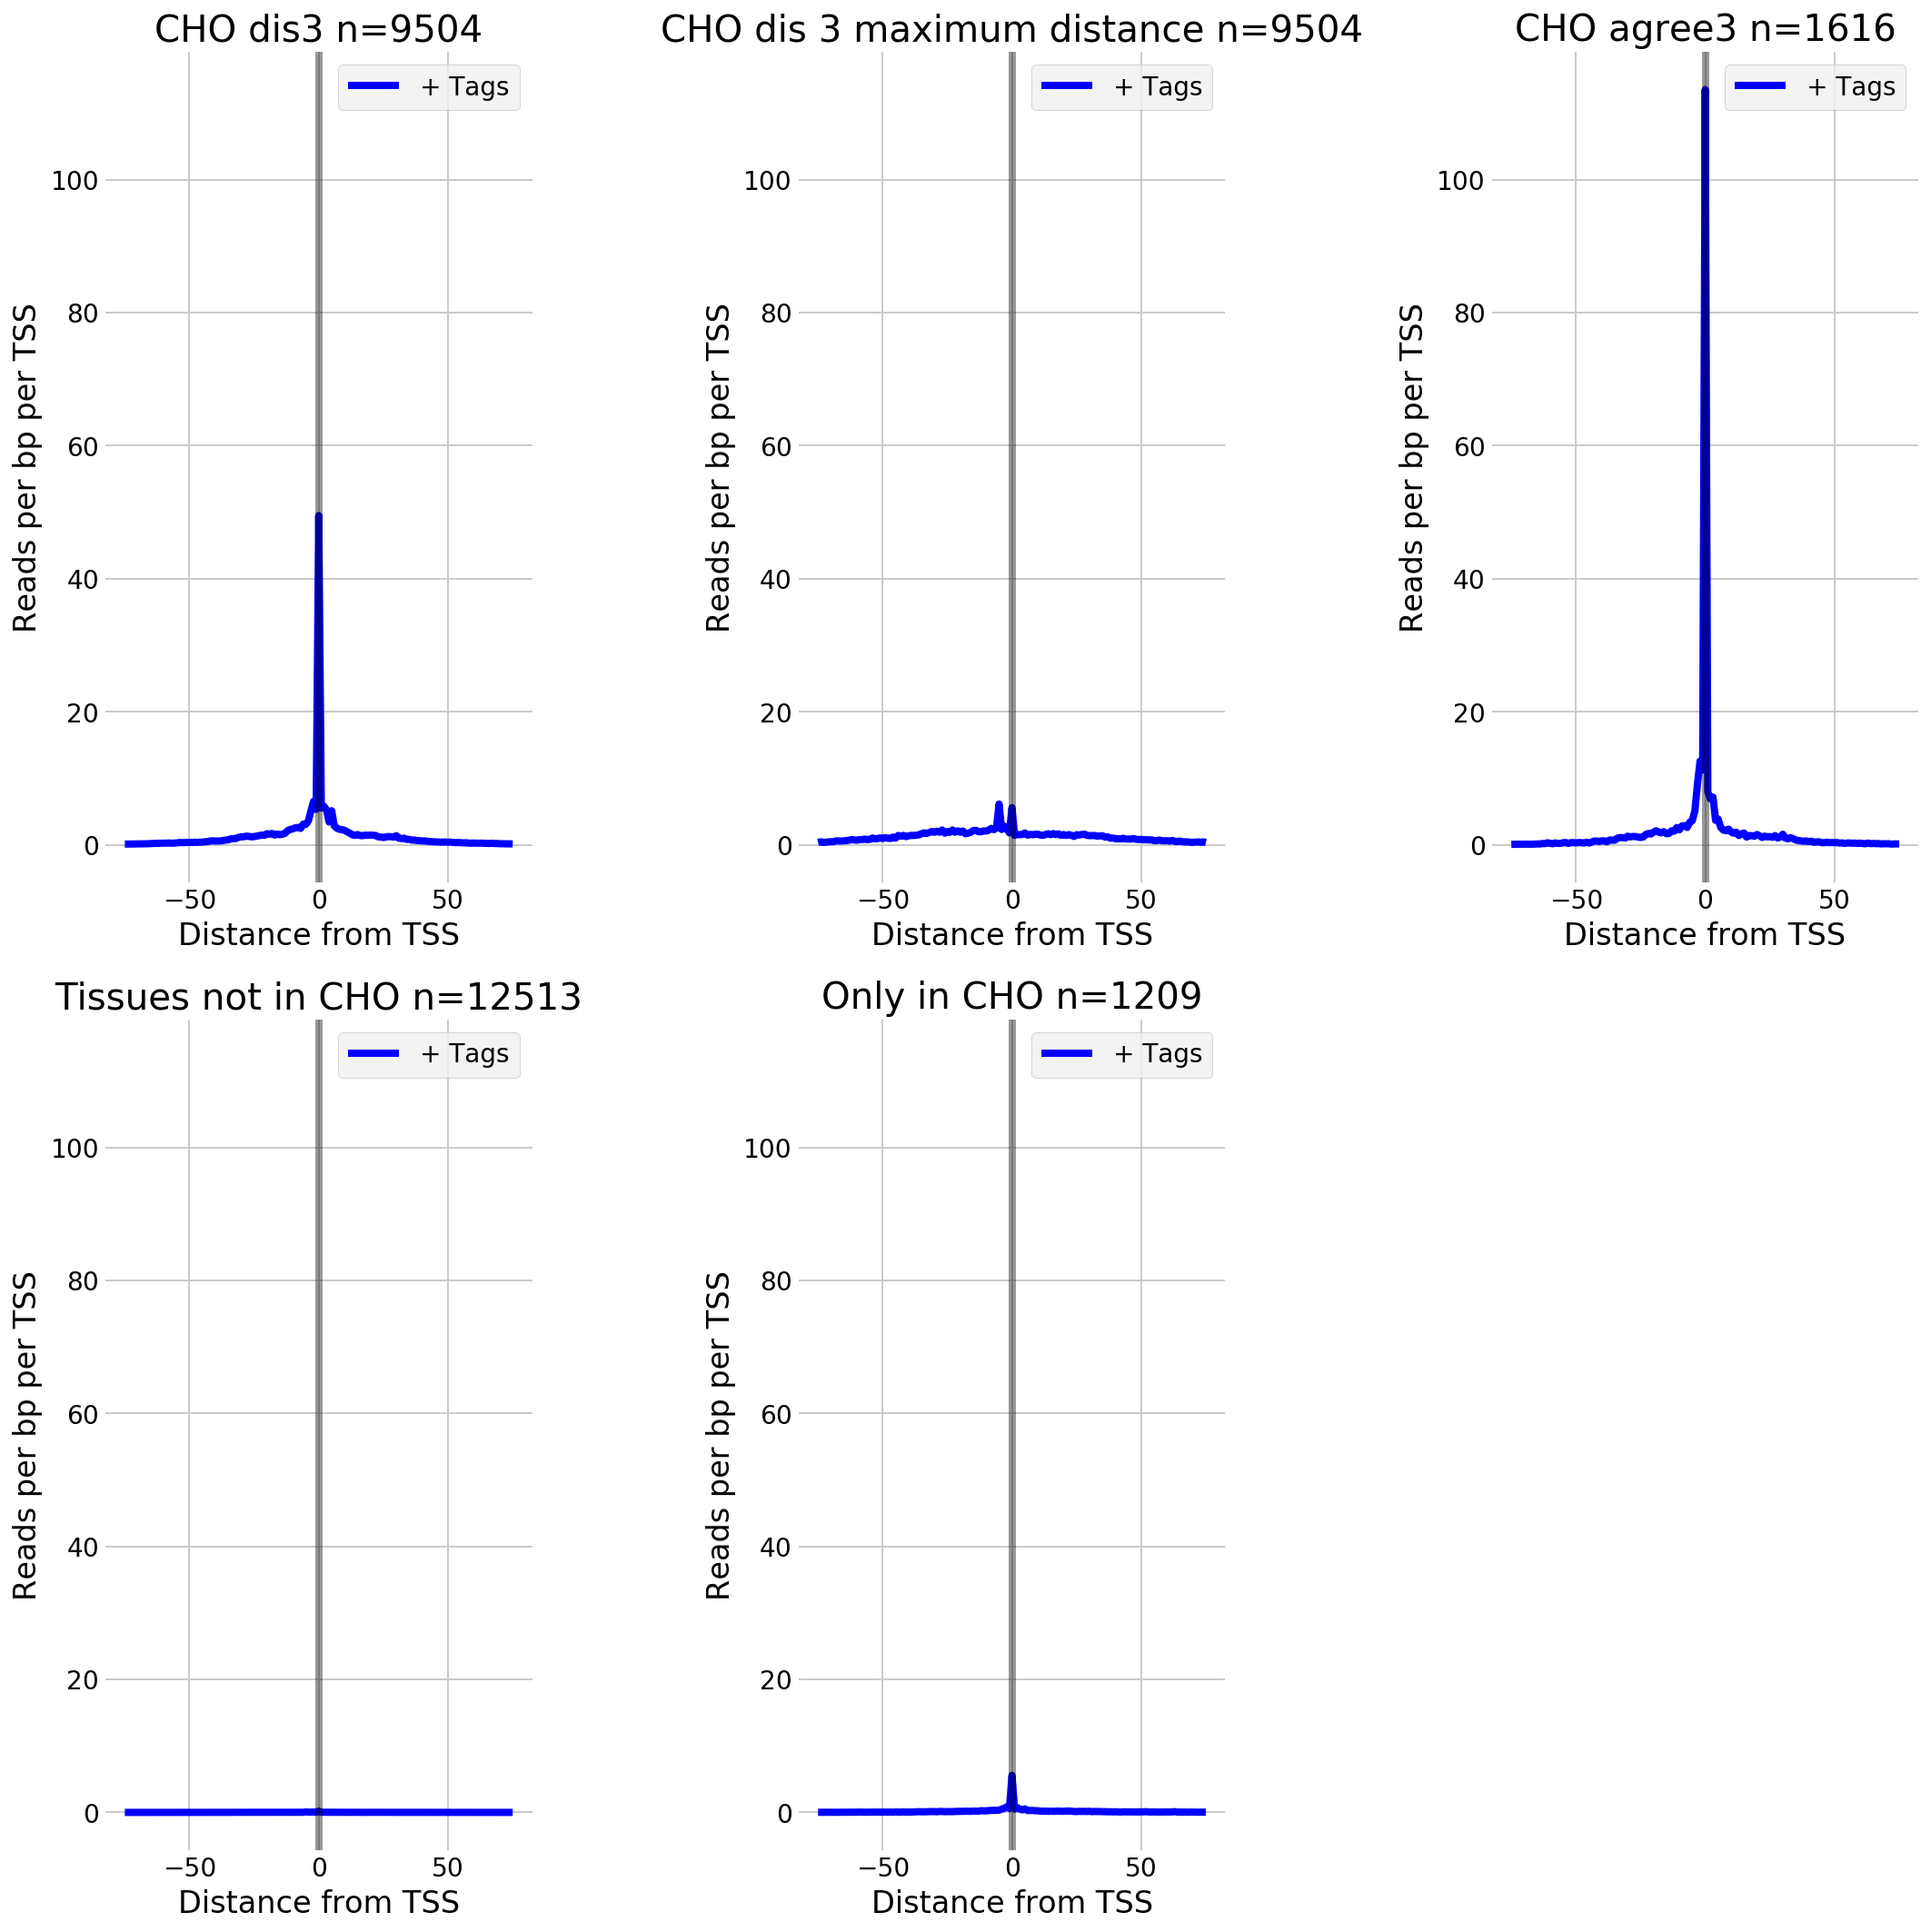

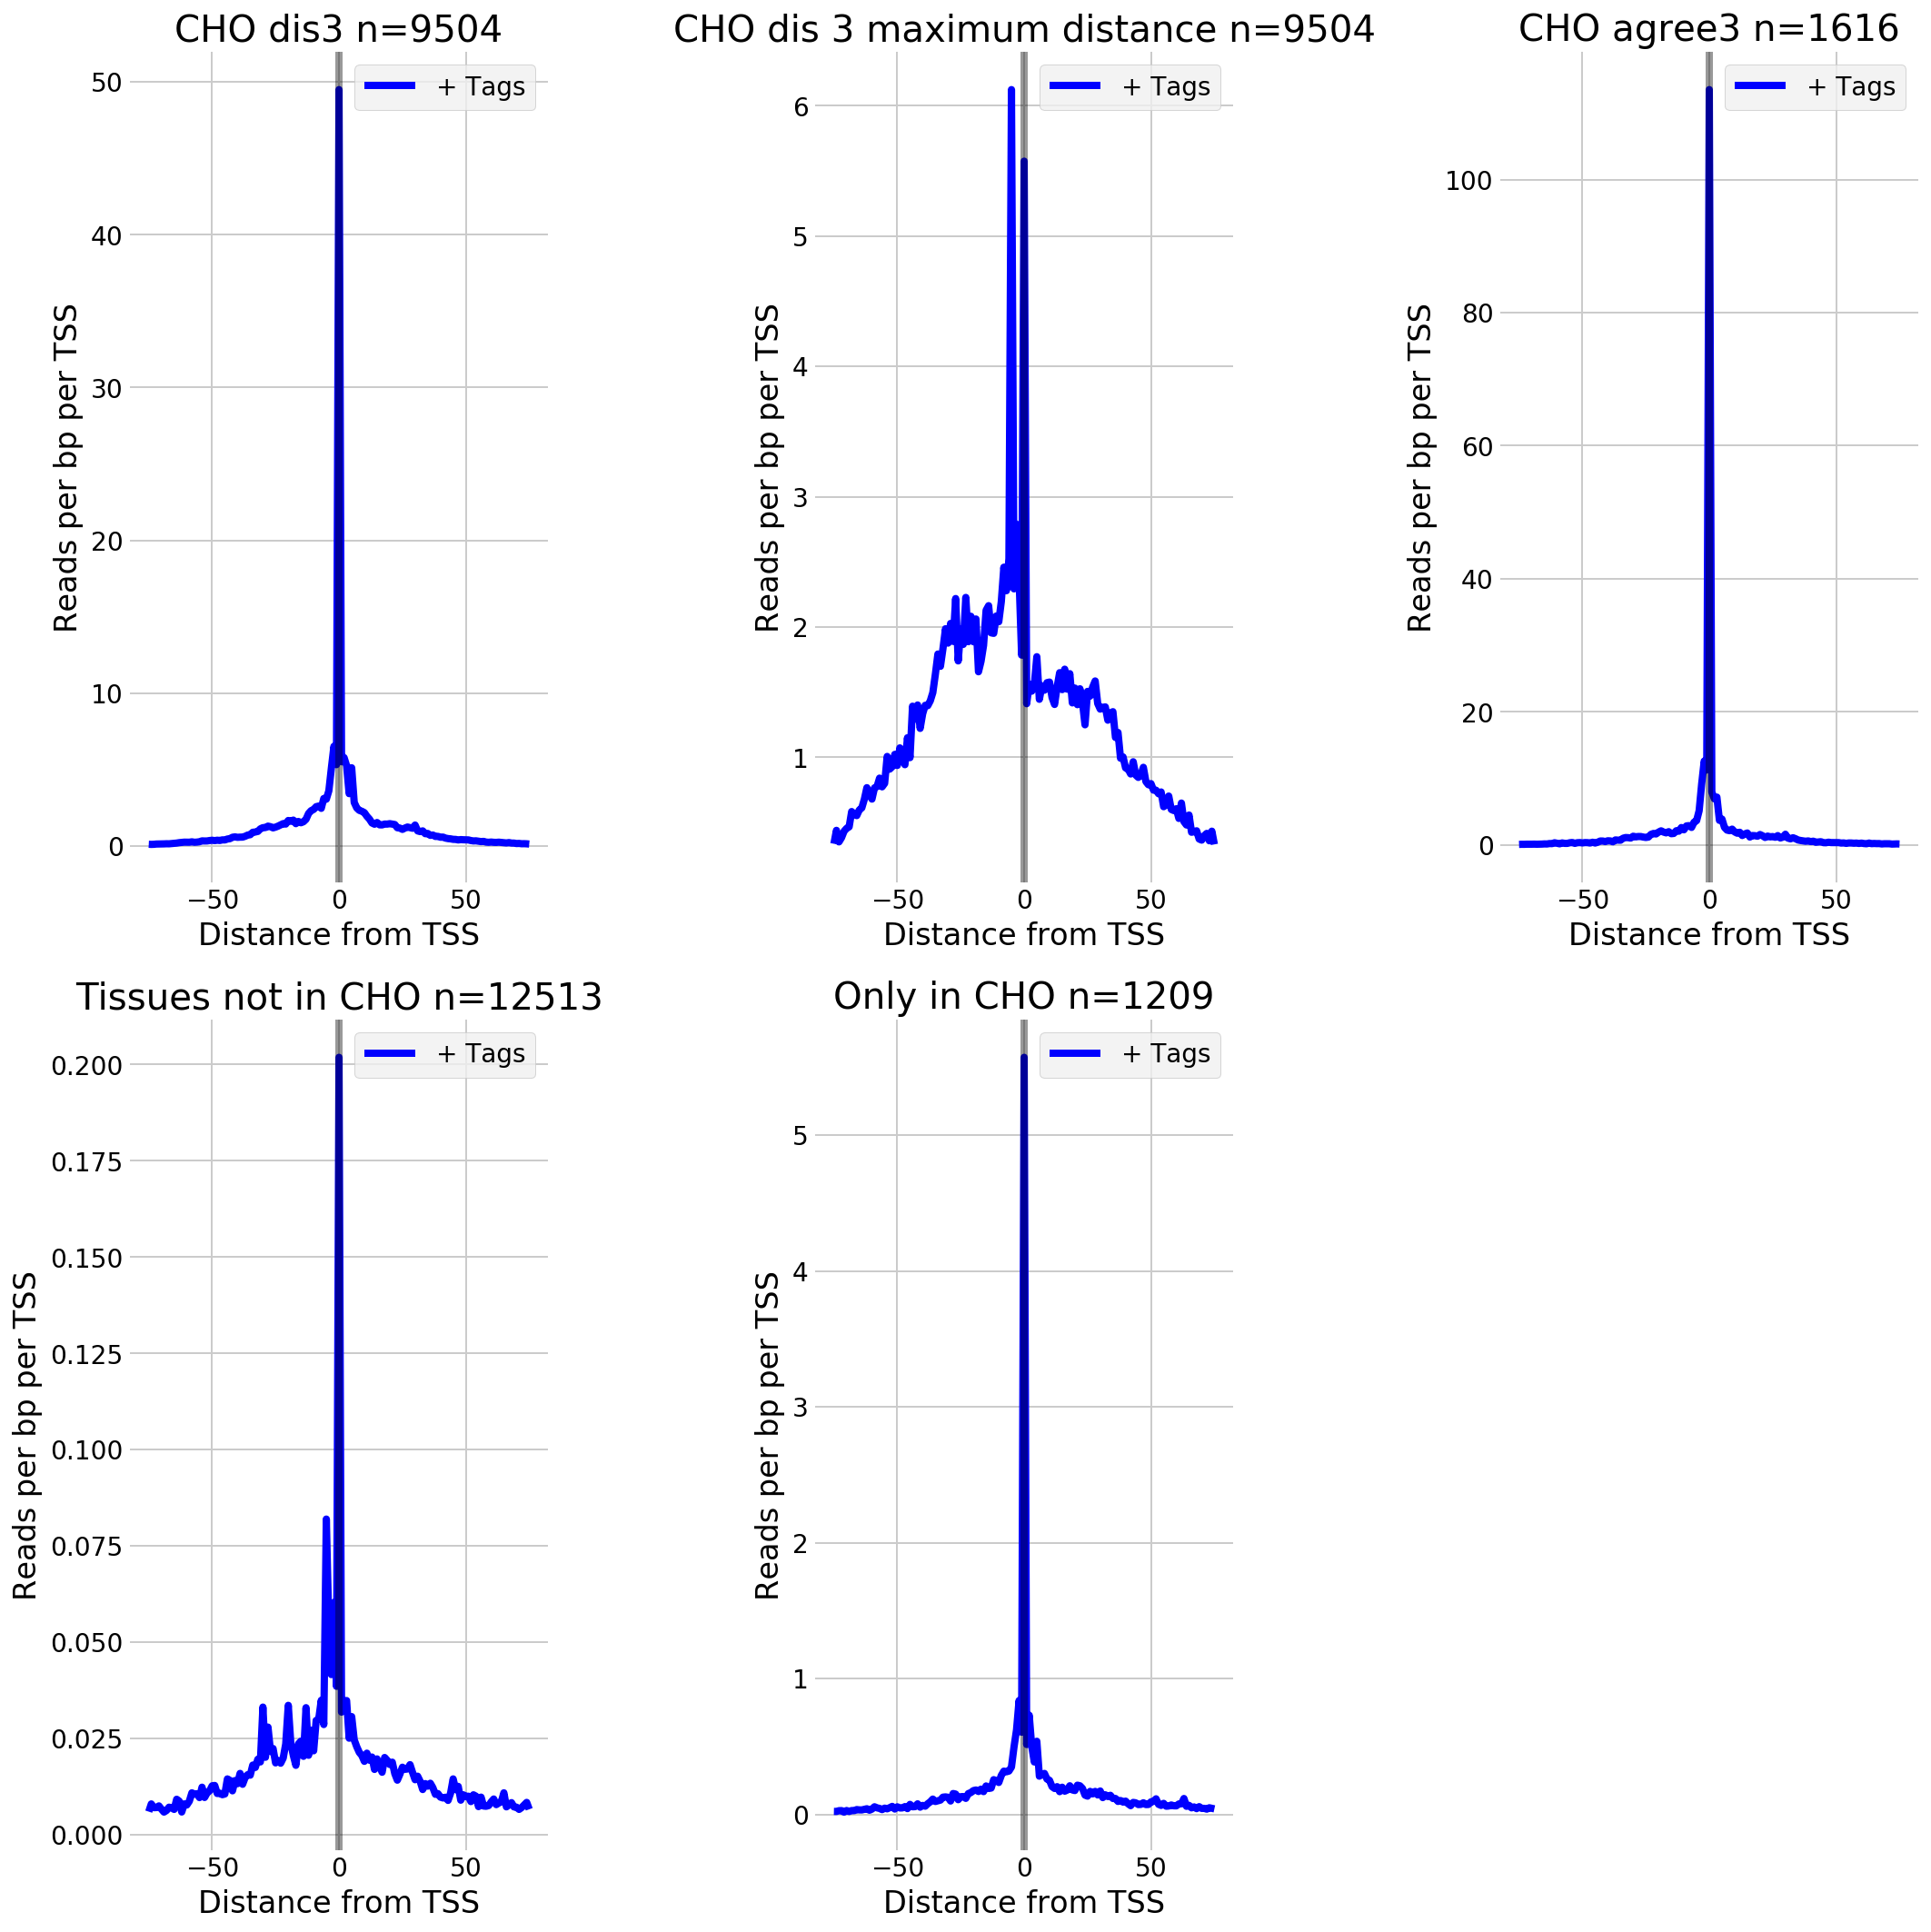

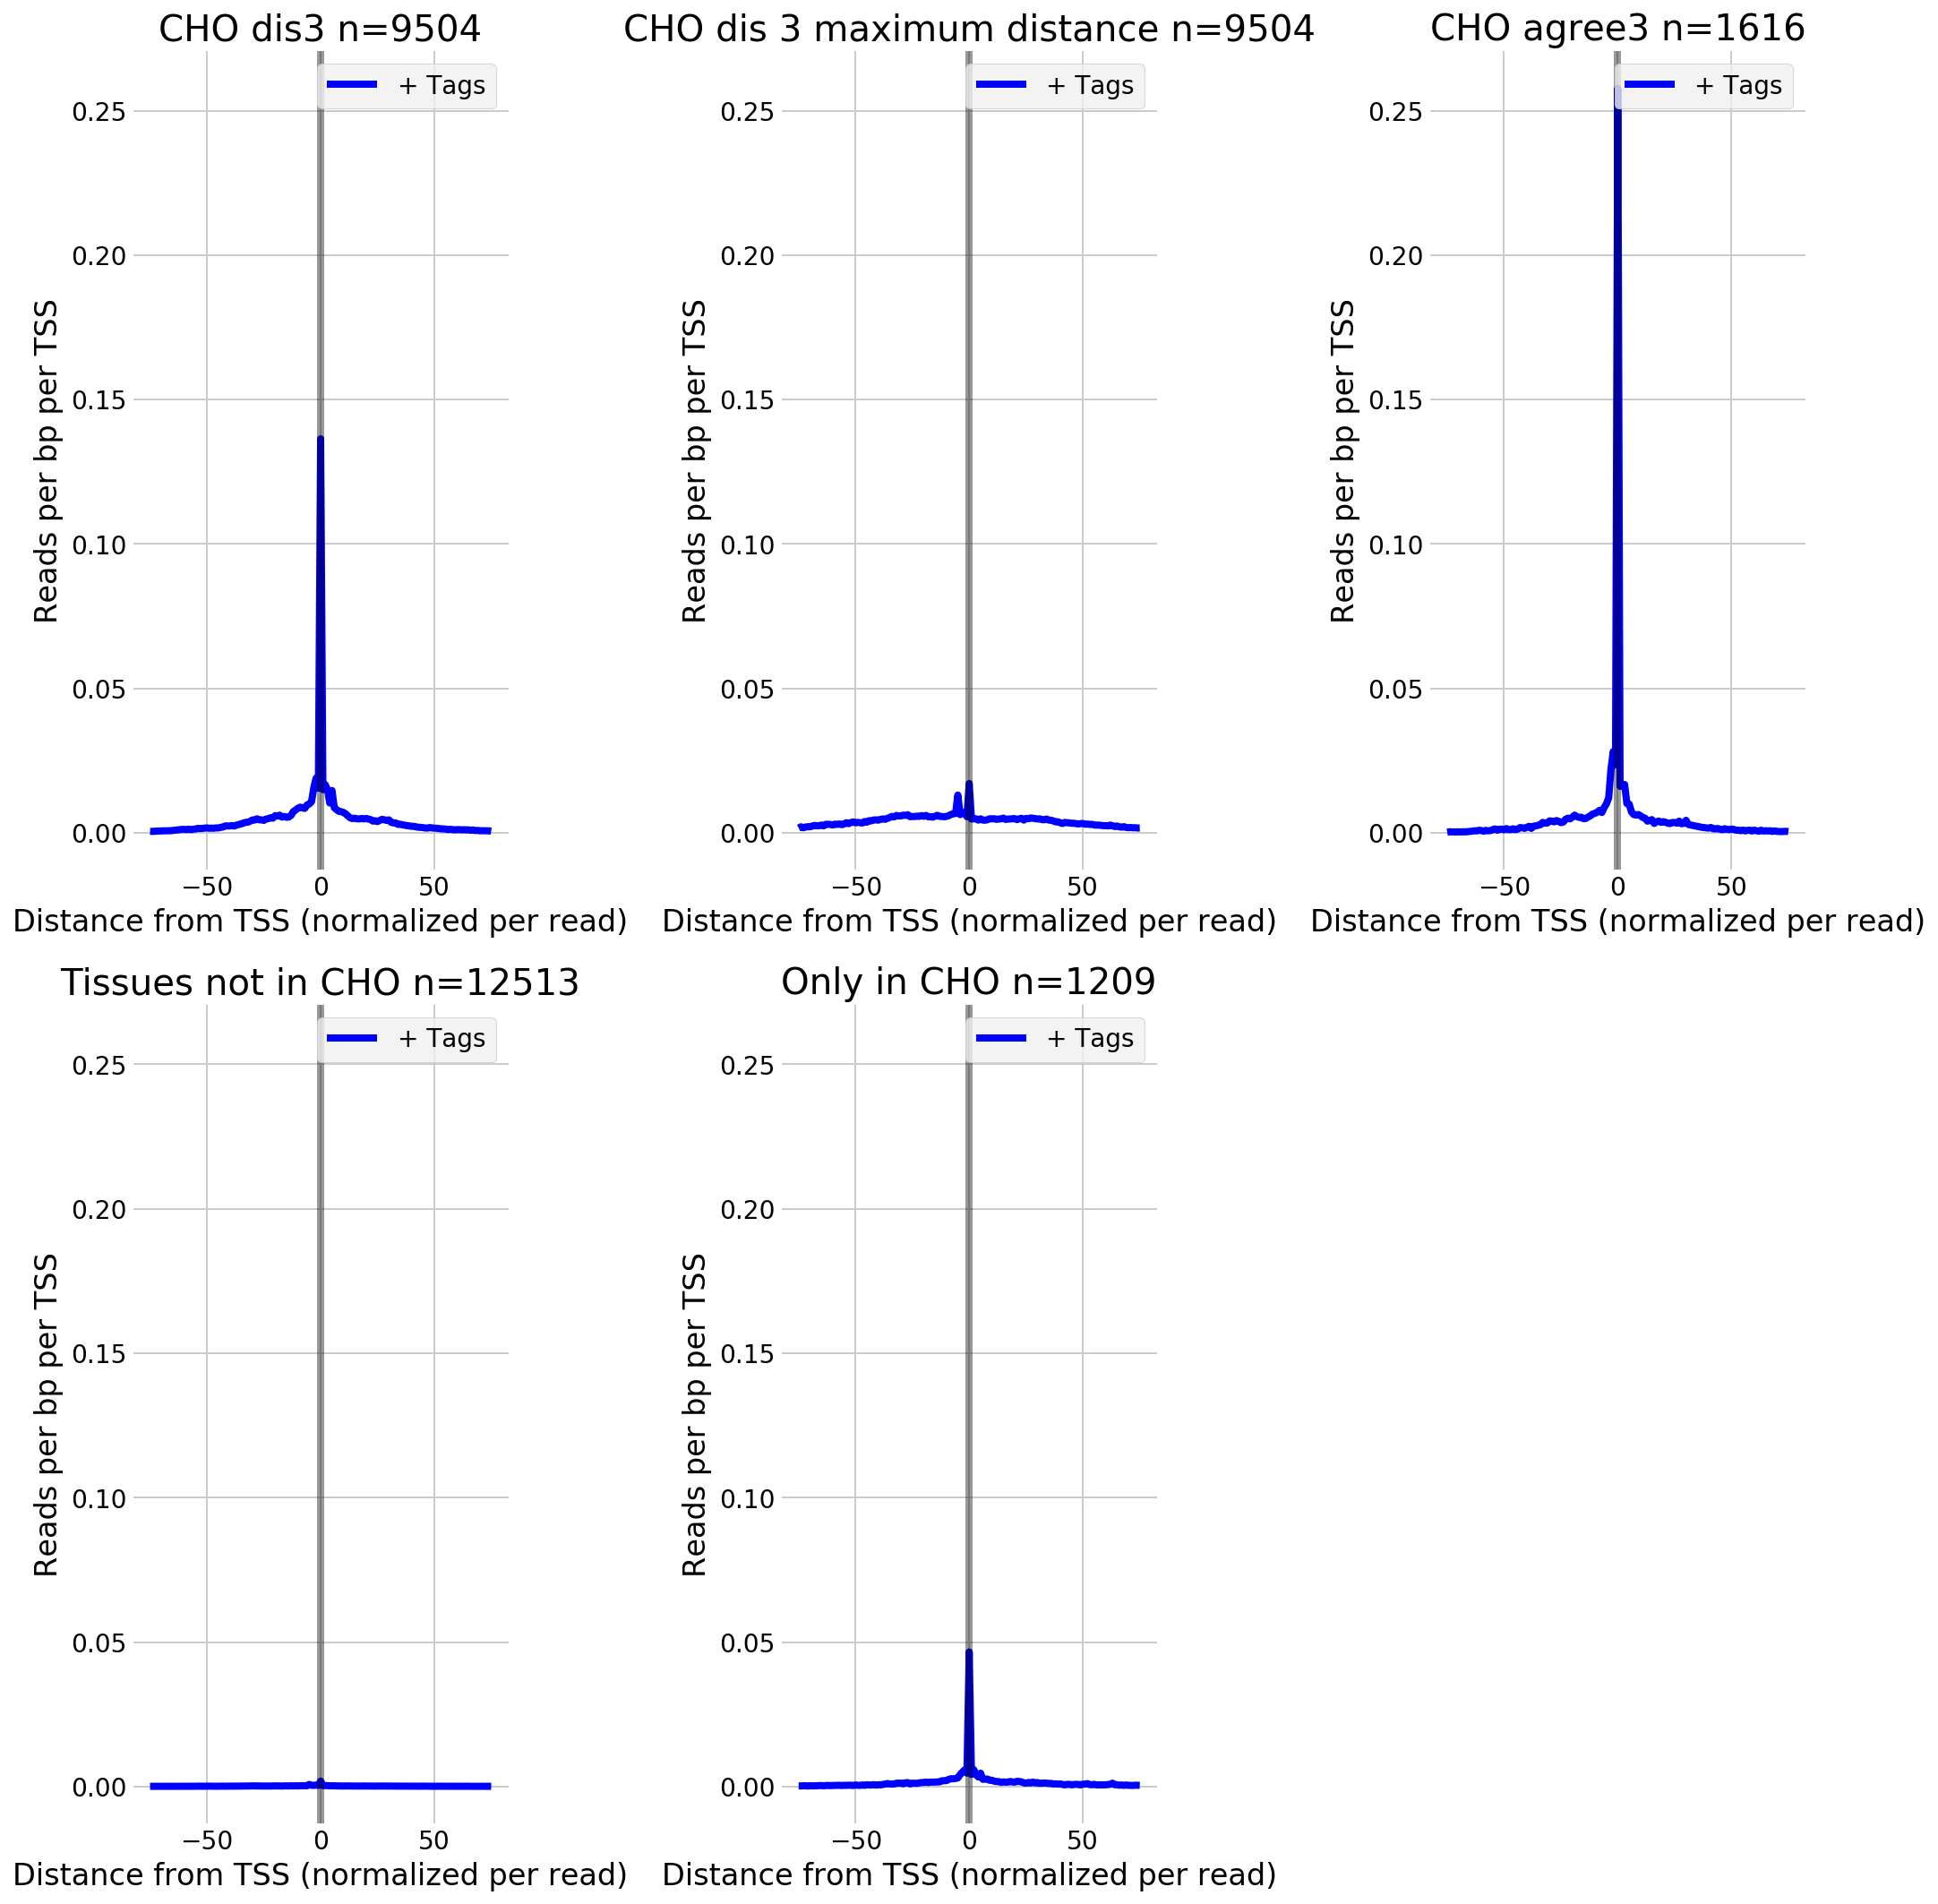

In [11]:
cho_dis3_maxDist_f = os.path.join(in_dir,"cho_disagree3_maxDistance_tol_0.tsv" )
cho_ag3_f = os.path.join(in_dir,"cho_agree3_tol_0.tsv" )
cho_dis3_f = os.path.join(in_dir,"cho_disagree3_tol_0.tsv" )
not_in_cho_f = os.path.join(in_dir, "not_in_cho.tsv")
only_in_cho_f = os.path.join(in_dir, "cho_only_tol_0.tsv")


peak_files = [cho_dis3_f,cho_dis3_maxDist_f,cho_ag3_f,not_in_cho_f, only_in_cho_f]
names = ["CHO dis3", "CHO dis 3 maximum distance", "CHO agree3", "Tissues not in CHO" ,"Only in CHO"]

out_hist = join(save_dir, "tol0_size150_res1_pc0")
if not os.path.exists(out_hist):
    os.mkdir(out_hist)
f_save = os.path.basename(tag_f)

run_hist(peak_files, tag_f, f_save, out_hist, region=150, res=1, pc=0, label=None, names=names)


f_save = os.path.basename(tag_f) + "_ylim"
run_hist(peak_files, tag_f, f_save, out_hist, region=150, res=1, pc=0, label=None, names=names, same_ylim=False)

# Normed histogram
out_hist = join(save_dir, "tol0_size150_res1_pc0_norm")
if not os.path.exists(out_hist):
    os.mkdir(out_hist)
f_save = os.path.basename(tag_f)

run_hist(peak_files, tag_f, f_save, out_hist, region=150, res=1, pc=0, label=None, names=names, to_norm=True)


### PC=3

Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3/cho_disagree3_tol_0
Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3/cho_disagree3_maxDistance_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_maxDistance_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/compare_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3_norm/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3_norm/cho_disagree3_tol_0
annotatePeaks.pl Results/histograms/compare_tissues/cho_disagree3_tol_0.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 150 -hist 1 -histNorm 100 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/histograms/compare_tissues/Figures/tol0_size150_res1_pc3_norm/cho_disagree3_tol_0Norm
Results/histograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

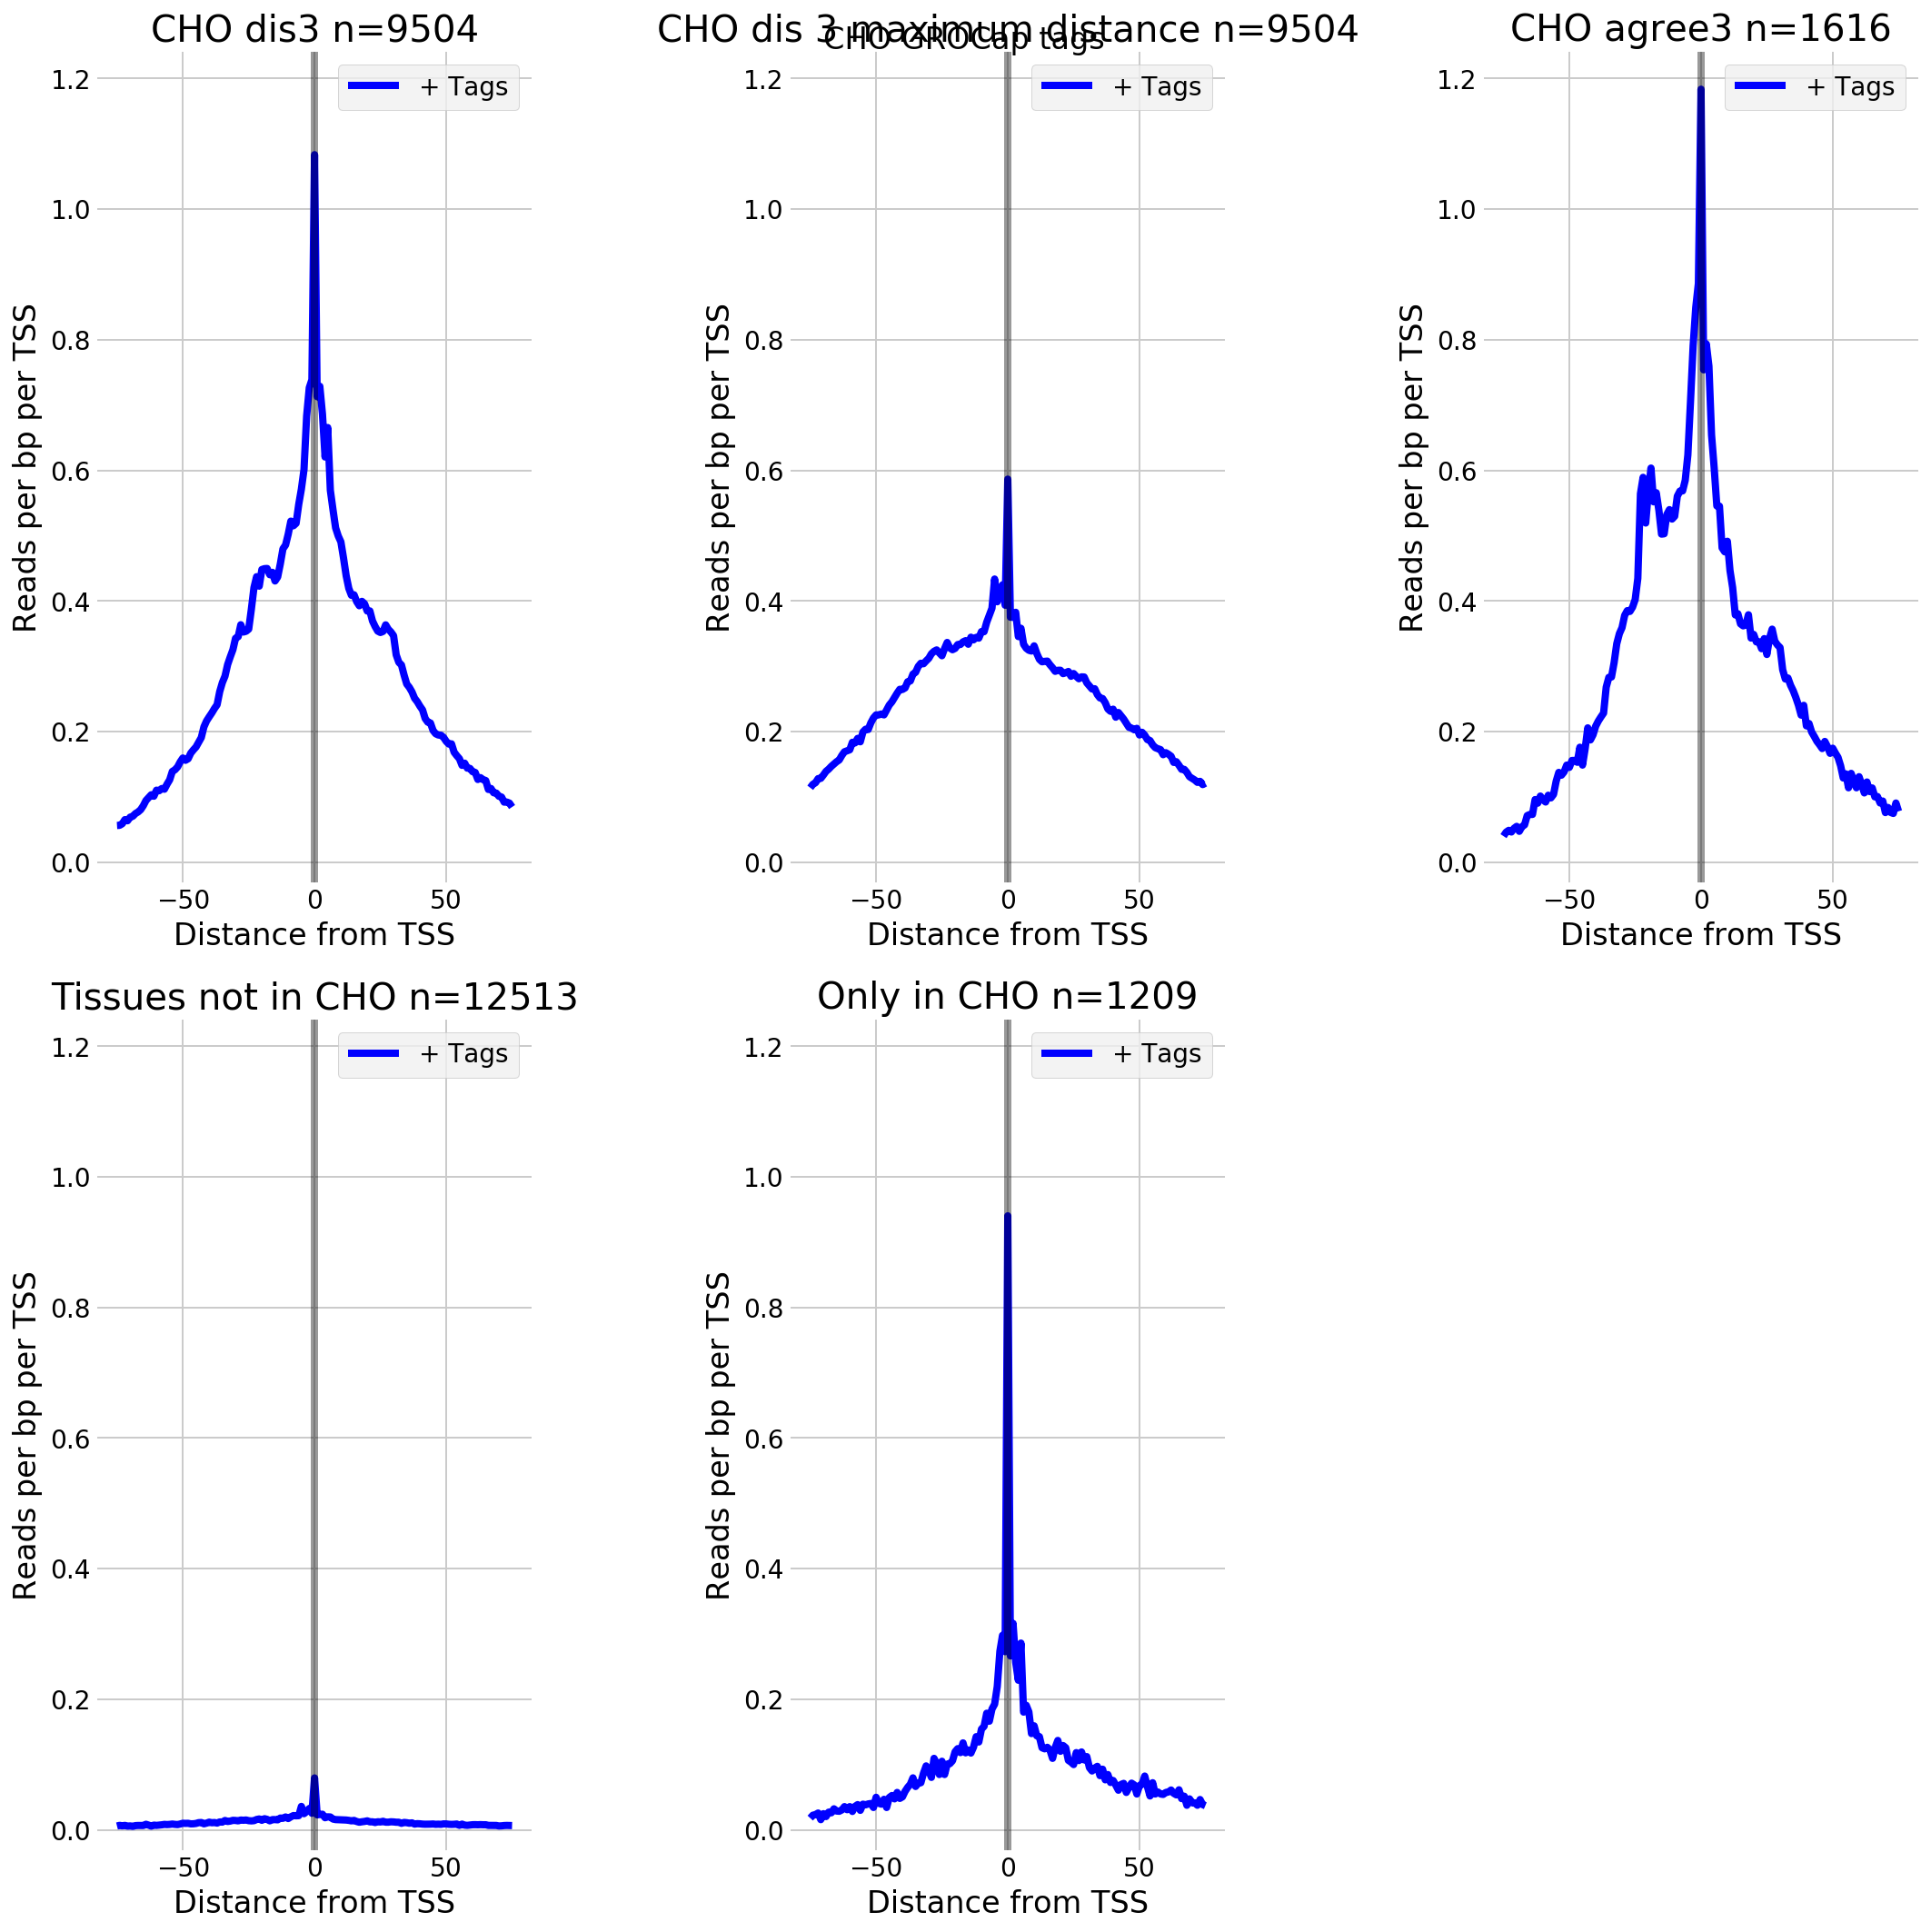

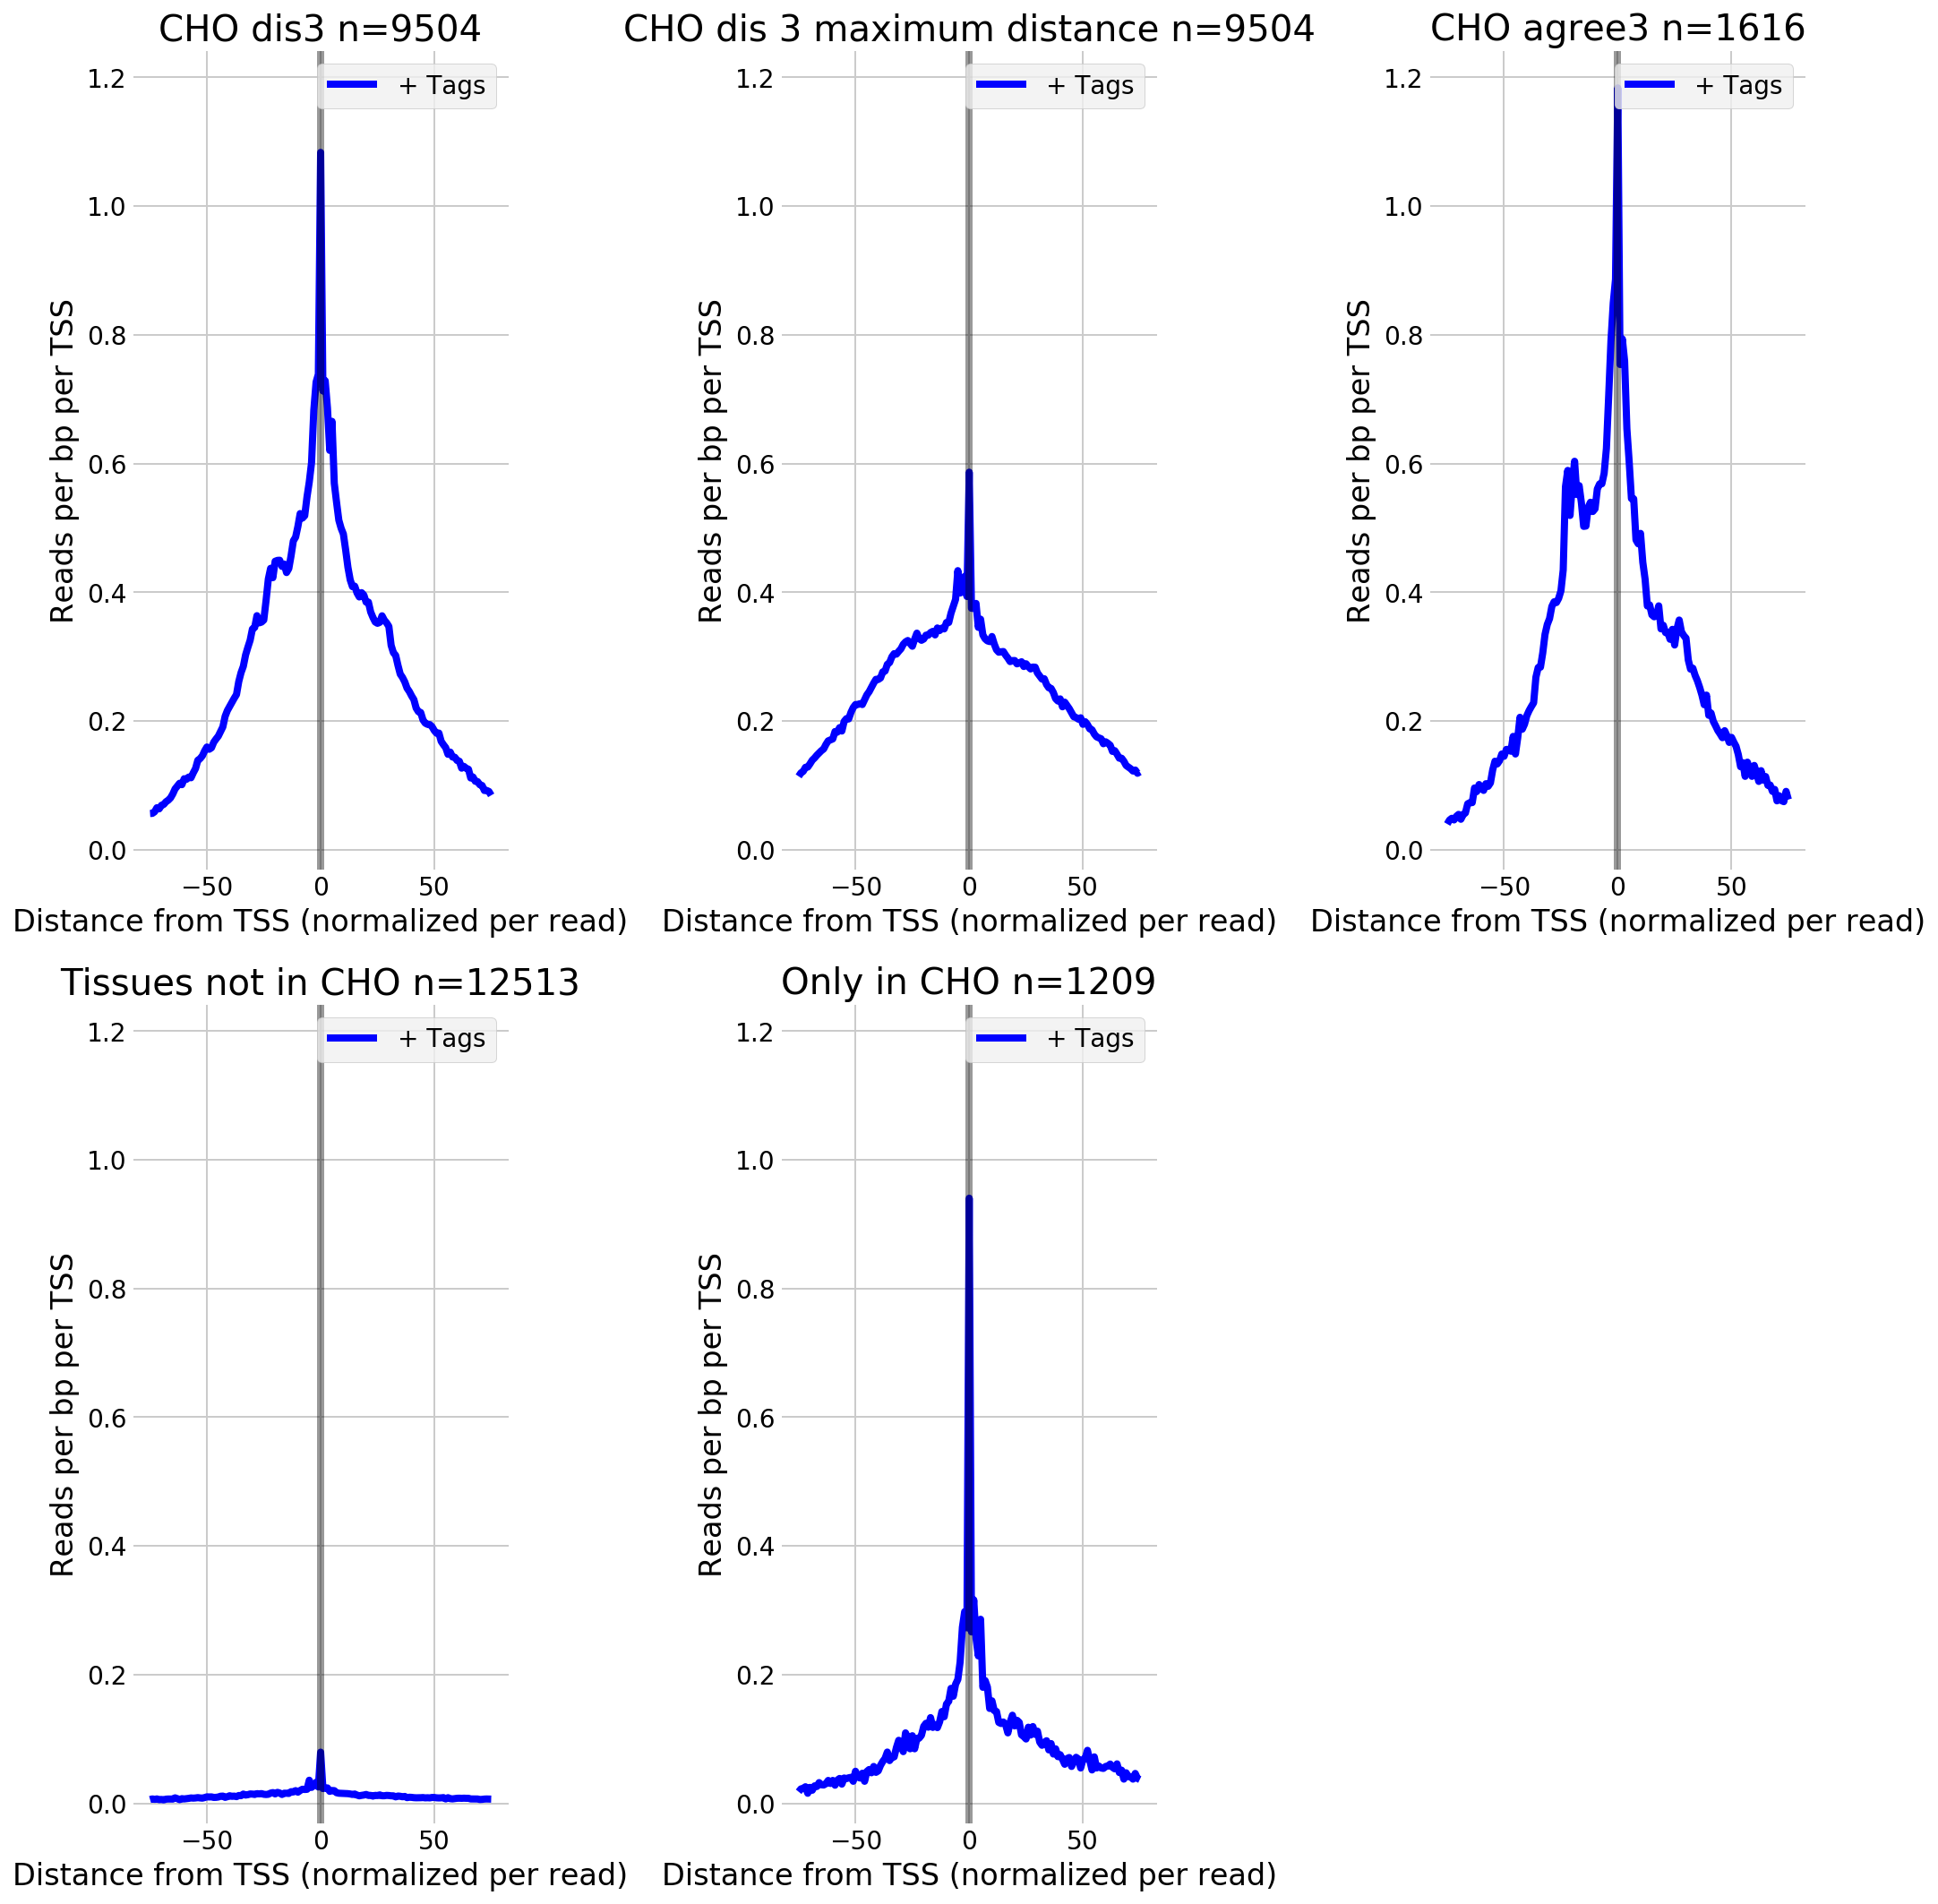

In [8]:
cho_dis3_maxDist_f = os.path.join(in_dir,"cho_disagree3_maxDistance_tol_0.tsv" )
cho_ag3_f = os.path.join(in_dir,"cho_agree3_tol_0.tsv" )
cho_dis3_f = os.path.join(in_dir,"cho_disagree3_tol_0.tsv" )
not_in_cho_f = os.path.join(in_dir, "not_in_cho.tsv")
only_in_cho_f = os.path.join(in_dir, "cho_only_tol_0.tsv")


peak_files = [cho_dis3_f,cho_dis3_maxDist_f,cho_ag3_f,not_in_cho_f, only_in_cho_f]
names = ["CHO dis3", "CHO dis 3 maximum distance", "CHO agree3", "Tissues not in CHO" ,"Only in CHO"]

out_hist = join(save_dir, "tol0_size150_res1_pc3")
if not os.path.exists(out_hist):
    os.mkdir(out_hist)
f_save = os.path.basename(tag_f)

run_hist(peak_files, tag_f, f_save, out_hist, region=150, res=1, pc=3, label="CHO GROCap tags", names=names)

# Normed histogram
out_hist = join(save_dir, "tol0_size150_res1_pc3_norm")
if not os.path.exists(out_hist):
    os.mkdir(out_hist)
f_save = os.path.basename(tag_f)

run_hist(peak_files, tag_f, f_save, out_hist, region=150, res=1, pc=3, label=None, names=names, to_norm=True)
